In [1]:
# Set up packages for lecture. Don't worry about understanding this code, but
# make sure to run it if you're following along.
import numpy as np
import babypandas as bpd
import pandas as pd
from matplotlib_inline.backend_inline import set_matplotlib_formats
import matplotlib.pyplot as plt
%reload_ext pandas_tutor
%set_pandas_tutor_options {'projectorMode': True}
set_matplotlib_formats("svg")
plt.style.use('fivethirtyeight')

np.set_printoptions(threshold=20, precision=2, suppress=True)
pd.set_option("display.max_rows", 7)
pd.set_option("display.max_columns", 8)
pd.set_option("display.precision", 2)

# Lecture 13 – Simulation

## DSC 10, Fall 2022

### Announcements

- Lab 4 is due **tomorrow at 11:59PM**.
- Homework 4 is due on **Tuesday 10/25 at 11:59PM**.
- The Midterm Project is due **Tuesday 11/1 at 11:59PM.** Use [pair programming 👯](https://dsc10.com/pair-programming/). See [this post](https://edstem.org/us/courses/29053/discussion/1992062) for clarifications. 
- 10+ more weekly office hours will be added starting next week!

### Midterm Exam details

The Midterm Exam is in one week, on **Friday, 10/28 during your assigned lecture**.
- It will be a 50 minute, on-paper, closed-notes exam. We will provide you with first 2 pages of the [reference sheet](https://drive.google.com/file/d/1mQApk9Ovdi-QVqMgnNcq5dZcWucUKoG-/view).
- It will consist of multiple choice, fill-in-the-blank code, and short answer questions.
- Bring a pen/pencil/eraser and a photo ID. No scantron or blue book needed.
- No calculator, computers, notes, or other aids are allowed.
- Seating assignments and alternate details are coming next week.
- **Today's material is on the midterm; next week's is not.**

### Agenda

Simulation.
 - Example: What's the probability of getting 60 or more heads if we flip 100 coins?
 - Example: The "Monty Hall" Problem.

## Simulation

### Simulation

- What is the probability of getting 60 or more heads if we flip 100 coins?

- While we _could_ calculate it by hand (and will learn how to in future courses), we can also approximate it using the computer:
    1. Figure out how to do one experiment (i.e., flip 100 coins).
    2. Run the experiment a bunch of times.
    3. Find the proportion of experiments in which the number of heads was 60 or more.

- This is how we'll use **simulation** – to approximate a probability through computation.
    - The techniques we will introduce in today's lecture will appear in almost every lecture for the remainder of the quarter!

### Making a random choice

- To simulate, we need a way to perform a random experiment on the computer (e.g. flipping a coin, rolling a die).

- A helpful function is `np.random.choice(options)`.
    - The input, `options`, is a list or array to choose from.
    - The output is a random element in `options`. By default, all elements are equally likely to be chosen.

In [2]:
# Simulate a fair coin flip
np.random.choice(['Heads', 'Tails'])

'Heads'

In [3]:
# Simulate a roll of a die
np.random.choice(np.arange(1, 7))

2

### Making multiple random choices

`np.random.choice(options, n)` will return an array of `n` randomly selected elements from `options`.

In [ ]:
# Simulate 10 fair coin flips
np.random.choice(['Heads', 'Tails'], 10)

### With replacement vs. without replacement

- By default, `np.random.choice` selects **with** replacement.
- That is, after making a selection, that option is still available.
    - e.g. if every time you draw a marble from a bag, you put it back.
- If an option can only be selected once, select **without** replacement by specifying `replace=False`.
    - e.g. if every time you draw a marble from a bag, you do not put it back.

In [4]:
# Choose three colleges to win free HDH swag
colleges = ['Revelle', 'John Muir', 'Thurgood Marshall', 
            'Earl Warren', 'Eleanor Roosevelt', 'Sixth', 'Seventh']

np.random.choice(colleges, 3, replace=False)

array(['Eleanor Roosevelt', 'Seventh', 'Thurgood Marshall'], dtype='<U17')

## Example: What's the probability of getting 60 or more heads if we flip 100 coins?

### Flipping coins

What is the probability of getting 60 or more heads if we flip 100 coins?

**Strategy:**

1. Figure out how to do one experiment (i.e., flip 100 coins).
2. Run the experiment a bunch of times.
3. Find the proportion of experiments in which the number of heads was 60 or more.

### Step 1: Figure out how to do one experiment

- Use `np.random.choice` to flip 100 coins.
- Use `np.count_nonzero` to count the number of heads.
    - `np.count_nonzero(array)` returns the number of entries in `array` that are `True`.
    

In [5]:
coins = np.random.choice(['Heads', 'Tails'], 100)
coins

array(['Heads', 'Tails', 'Heads', ..., 'Heads', 'Heads', 'Tails'],
      dtype='<U5')

In [6]:
(coins == 'Heads').sum()

54

In [7]:
np.count_nonzero(coins == 'Heads') # counts the number of Trues in sequence

54

- Q: Why is it called `count_nonzero`?
- A: In Python, `True == 1` and `False == 0`, so counting the non-zero elements counts the number of `True`s.

### Aside: Putting the experiment in a function

It's a good idea to do this, as it makes it easier to run the experiment repeatedly.

In [12]:
def coin_experiment():
    coins = np.random.choice(['Heads', 'Tails'], 100)
    return np.count_nonzero(coins == 'Heads')

In [13]:
coin_experiment()

49

### Step 2: Repeat the experiment

- How do we run the same code many times? **Using a `for`-loop!**
- Each time we run the experiment, we'll need to store the results in an array.
    - To do this, we'll use `np.append`!

In [14]:
head_counts = np.array([])
head_counts

array([], dtype=float64)

In [15]:
head_counts = np.append(head_counts, 15)
head_counts

array([15.])

In [16]:
head_counts = np.append(head_counts, 25)
head_counts

array([15., 25.])

### Step 2: Repeat the experiment

In [25]:
# Specify the number of repetitions
repetitions = 10000

# Create an empty array to store the results
head_counts = np.array([])

for i in np.arange(repetitions):
    # For each repetition, run the experiment and add the result to head_counts
    head_count = coin_experiment()
    head_counts = np.append(head_counts, head_count)

In [26]:
len(head_counts)

100000

In [27]:
head_counts

array([52., 57., 49., ..., 47., 49., 44.])

### Step 3: Find the proportion of experiments in which the number of heads was 60 or more

In [28]:
# In how many experiments was the number of heads >= 60?
at_least_60 = np.count_nonzero(head_counts >= 60)
at_least_60

2787

In [30]:
# What is this as a proportion?
at_least_60 / repetitions

0.02787

In [31]:
# Can also use np.mean()! Why?
np.mean(head_counts >= 60)

0.02787

This is quite close to the true theoretical answer!

In [29]:
# The theoretical answer – don't worry about how or why this code works
import math
sum([math.comb(100, i) * (1 / 2) ** 100 for i in np.arange(60, 101)])

0.028443966820490392

### Visualizing the distribution

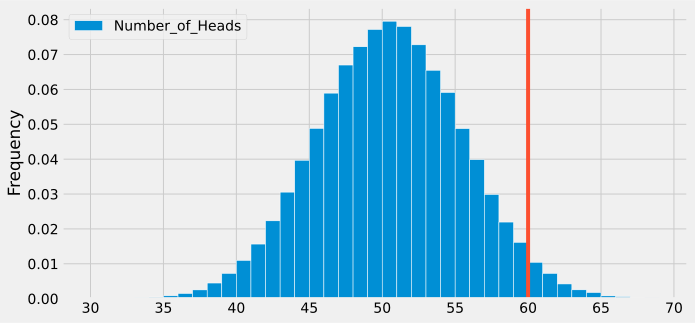

In [32]:
bpd.DataFrame().assign(
    Number_of_Heads=head_counts
).plot(kind='hist', bins=np.arange(30, 70), density=True, ec='w', figsize=(10, 5));
plt.axvline(60, color='C1');

- This histogram describes the distribution of the number of heads in each experiment.
- Now we see another reason to use density histograms.
    - Using density means that areas approximate **probabilities**.

## Example: The "Monty Hall" Problem

<img src="data/monty_1.svg" width=75% />

<img src="data/monty_2.svg" width=75% />

<img src="data/monty_3.svg" width=85% />

### The "Monty Hall" Problem

Suppose you’re on a game show, and you’re given the choice of three doors: behind one door is a car 🚗; behind the others, goats 🐐🐐. 

- You pick a door, say No. 2, and the host, **who knows what’s behind the doors**, opens another door, say No. 3, which has a goat. 

- He then says to you, “Do you want to pick door No. 1?” 

- **Question:** Is it to your advantage to switch your choice?

_(The question was originally posed in Parade magazine’s "Ask Marilyn" column. It is called the "Monty Hall problem" because Monty Hall was the host of the game show in question, "Let's Make a Deal.")_

### Concept Check ✅ – Answer at [cc.dsc10.com](http://cc.dsc10.com) 

You originally selected door #2. The host reveals door #3 to have a goat behind it. What should you do?

A. Might as well stick with door number #2; it has just as high a chance of winning as door #1. It doesn't matter whether you switch or not.

B. Switch to door number #1; it has a higher chance of winning than door #2.

### Let's see 🤔

- We'll use simulation to compute:
    - The probability of winning if we switch.
    - The probability of winning if we stay.
        - This is just 1 - (probability of winning if we switch).
- Whichever strategy has the higher probability of winning is better!

### Time to simulate!

Let's **simulate** the Monty Hall problem many times to **estimate** the probability of winning.

1. Figure out how to simulate one game of Monty Hall.
2. Play the game many times.
3. Count the proportion of wins for each strategy (stay or switch).

### Step 1: Simulate a single game

When a contestant picks their door, there are three equally-likely outcomes:

1. Car.
1. Goat #1.
1. Goat #2.

In [33]:
behind_picked_door = np.random.choice(['Car', 'Goat #1', 'Goat #2'])
behind_picked_door

'Goat #1'

### Step 1: Simulate a single game

Suppose we can see what is behind their door (but the contestant can't).

- If it is a car, they will win if they stay.
- If it is a goat, they will win if they switch.

### Step 1: Simulate a single game

In [34]:
# Determine winning_strategy ('Stay' or 'Switch') based on what behind_picked_door is.

if behind_picked_door == 'Car':
    winning_strategy = 'Stay'
else:
    # A goat was behind the picked door. Monty will reveal the other goat. 
    # Switching wins:
    winning_strategy = 'Switch'

### Step 1: Simulate a single game

Let's turn this into a function to make it easier to repeat:

In [35]:
def simulate_monty_hall():
    behind_picked_door = np.random.choice(['Car', 'Goat #1', 'Goat #2'])
    
    if behind_picked_door == 'Car':
        winning_strategy = 'Stay'
    else:
        winning_strategy = 'Switch'
        
#     print(behind_picked_door, 'was behind the door. Winning strategy:', winning_strategy)
    return winning_strategy

In [36]:
simulate_monty_hall()

'Stay'

### Step 2: Play the game many times

We should save the winning strategies. To do so, let's use `np.append`:

In [37]:
repetitions = 10000

winning_strategies = np.array([])

for i in np.arange(repetitions):
    winning_strategy = simulate_monty_hall()
    winning_strategies = np.append(winning_strategies, winning_strategy)

In [38]:
winning_strategies

array(['Switch', 'Switch', 'Switch', ..., 'Switch', 'Stay', 'Stay'],
      dtype='<U32')

### Step 3: Count the proportion of wins for each strategy (stay or switch)

In [39]:
winning_strategies

array(['Switch', 'Switch', 'Switch', ..., 'Switch', 'Stay', 'Stay'],
      dtype='<U32')

In [40]:
np.count_nonzero(winning_strategies == 'Switch')

6705

In [41]:
np.count_nonzero(winning_strategies == 'Switch') / repetitions

0.6705

In [42]:
np.count_nonzero(winning_strategies == 'Stay') / repetitions

0.3295

- These are quite close to the true probabilities of winning per strategy ($\frac{2}{3}$ for switch, $\frac{1}{3}$ for stay).
- **Conclusion:** it is better to switch.

### Alternate implementation

- Looking back at our implementation, we kept track of the winning strategy in each experiment.

- However, all we really needed to keep track of was the **number of experiments** in which the winning strategy was `'Switch'` (or `'Stay'`).

- Idea: Keep a _tally_ of the number of times the winning strategy was `'Switch'`. That is, initialize `switch_count` to 0, and add 1 to it each time the winning strategy is `'Switch'`.

In [43]:
switch_count = 0

In [44]:
for i in np.arange(repetitions):
    winning_strategy = simulate_monty_hall()
    if winning_strategy == 'Switch':
        switch_count = switch_count + 1

In [45]:
switch_count / repetitions

0.6694

In [46]:
1 - switch_count / repetitions

0.3306

No arrays needed! This strategy won't always work; it depends on the goal of the simulation.

### Marilyn vos Savant's column


<div style="display: flex; margin-top: .5in; margin-right: 1in">
<div style="width: 85%;">
    <ul>
        <li>vos Savant asked the question in <i>Parade</i> magazine.</li>
        <li>She stated the correct answer: <i>switch</i>.</li>
        <li>She received over 10,000 letters in disagreement, including over 1,000 letters from people with Ph.D.s.</li>
    </ul>
</div>
<div style="width: 40%;">
    <img src="data/vos_savant.jpg" width=300>
</div>
</div>


## Summary, next time

### Simulation finds probabilities

- Calculating probabilities is important, but can be hard!
    - You'll learn plenty of formulas in future DSC classes.
- Simulation lets us find probabilities through computing instead of math.
- Many real-world scenarios are complicated.
    - Simulation is much easier than math in many of these cases.

### The simulation "recipe"

To estimate the probability of an event through simulation:
1. Make a function that runs the experiment once.
2. Run that function many, many times (usually 10000) with a `for`-loop, and save the results in an array with `np.append`.
3. Compute the proportion of times the event occurs using `np.count_nonzero`.

### What's next?

- In the next class, we will start talking about sampling.
    - Key idea: We want to learn something about a large population (e.g. all undergraduates at UCSD). However, it's far too difficult to survey everyone. If we collect a sample, what can we infer about the larger population?
- **Today's material is on the midterm; next week's is not.**